In [0]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
from torch.autograd import Variable

##Finding derivative

Let's find the derivative of the function using PyTorch autograd:
$$\sin\left(\tan(x)\frac{x^2}{y} + \ln(e^{-x^2 + 3}+x^3y)\right)\tan(x^2e^{x^9})$$


In [0]:
x = torch.FloatTensor([1]).uniform_()
y = torch.FloatTensor([21]).uniform_()
x = Variable(x, requires_grad=True)
y = Variable(y, requires_grad=True)

def f(x,y):
    func = (torch.tan(x) * x**2 / y + ((-x**2 + 3).exp() + x**3 * y).log()).sin() * torch.tan(x**2 * (x ** 9).exp())
    func.sum().backward()
    return func

In [0]:
def find_x_derivative(x, y):
    x = torch.tensor([x], dtype=float, requires_grad=True)
    y = torch.tensor([y], dtype=float, requires_grad=True)
    func = (torch.tan(x) * x**2 / y + ((-x**2 + 3).exp() + x**3 * y).log()).sin() * torch.tan(x**2 * (x ** 9).exp())
    func.backward()
    return x.grad

In [0]:
find_x_derivative(1, 21)

tensor([-9.0207], dtype=torch.float64)

##Finding cosine similarity

$$\cos(angle(x, y)) = \frac{x \cdot y}{\left\|x\right\| \left\|y\right\|}$$

In [0]:
A = [[1, -47, 25, -3], [10, 17, -15, 22], [-3, -7, 26, 36], [12, -27, -42, 0]]
B = [[-50, -13, 1, 10, 1242], [21, 48, -13, -14, -20], [20, 15, 11, 43, 11], [11, 103, 147, 27, -8]]

In [0]:
def get_cos_sim(A, B):
    A = torch.FloatTensor(A)
    B = torch.FloatTensor(B)
    cos_sim = torch.FloatTensor(A.shape[0], B.shape[1]).zero_()
    A_split = torch.split(A, 1, dim = 0)
    B_split = torch.split(B, 1, dim = 1)
    for i in range(len(A_split)):
        for j in range(len(B_split)):
            #cos_sim[i][j] = A_split[i] @ B_split[j] / torch.norm(A_split[i], dim = 1, keepdim = True) * torch.norm(B_split[j], dim = 0, keepdim = True)
            cos_sim[i][j] = torch.matmul(A_split[i]/torch.norm(A_split[i], dim=1, keepdim=True),(B_split[j]/torch.norm(B_split[j], dim=0, keepdim=True)))
    return cos_sim

In [0]:
get_cos_sim(A, B)

tensor([[-0.1817, -0.3581,  0.0565,  0.5813,  0.0375],
        [-0.1031,  0.7134,  0.5828, -0.1064,  0.2852],
        [ 0.3467,  0.7313,  0.8498,  0.8934, -0.0641],
        [-0.6642, -0.3515, -0.0130, -0.4751,  0.2349]])

In [0]:
torch.mean(get_cos_sim(A, B))

tensor(0.1498)

##Linear regression using PyTorch

In [0]:
#X shape torch.Size([1, 100, 2]) 
#y.shape torch.Size([1, 100, 3])
#W shape torch.Size([2, 3])
#b shape torch.Size([1, 3])
#num_samples = 100
#input_shape = 2
#output_shape (or num_targets) = 3

In [0]:
class LinearRegression:

    def init_weights(self, input_size, output_size):
        torch.manual_seed(0)
        self.W = torch.rand(input_size, output_size, requires_grad=True)
        self.b = torch.zeros(1, output_size, requires_grad=True)

    def fit(self, X, y, num_epochs=1000, lr=0.001):

        def get_loss(self, preds, y):
            num_samples, num_targets = y.shape
            mse = torch.sum((y - preds)**2) / (num_samples * num_targets)
            return mse

        self.init_weights(X.shape[2], y.shape[2])
        metrics = []

        for _ in range(num_epochs):

            preds = self.predict(X)
            loss = get_loss(self, preds, y[0])
            loss.backward()

            with torch.no_grad():
                self.W.data -= self.W.grad * lr
                self.b.data -= self.b.grad * lr
                self.W.grad.zero_()
                self.b.grad.zero_()

            metrics.append(loss.data)

        return metrics

    def predict(self, X):
        X = X.type_as(torch.FloatTensor())[0]
        y_pred = X.mm(self.W) + self.b
        return y_pred

In [3]:
X, Y = datasets.make_regression(n_targets=3, n_features=2, noise=10, random_state=42)
X = torch.tensor([X], dtype=float, requires_grad=True)
Y = torch.tensor([Y], dtype=float, requires_grad=True)

model = LinearRegression()
mse = model.fit(X, Y)

print(np.mean(mse))

4256.561075369085


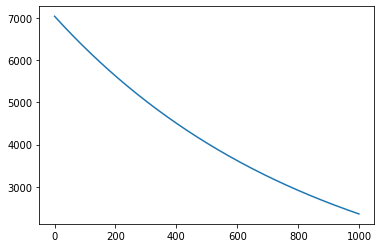

In [4]:
plt.plot(mse)